In [33]:
from random import *
import numpy as np
import matplotlib.pyplot as plt

def randomSolution(tspMatrix):
    cities = list(range(len(tspMatrix)))  # Get a list of cities in the problem space
    solution = []
    
    for i in range(len(tspMatrix)):
        randCity = cities[randint(0, len(cities)-1)]  # Generate a random city from the problem space
        solution.append(randCity)  # Append it to the solutions list
        cities.remove(randCity)  # Remove the appended city so it is not used on the next iteration
    
    return solution

In [34]:
def routeLength(tspMatrix, solution):
    routeLength = 0
    for i in range(len(solution)):
        routeLength += tspMatrix[solution[i]][solution[(i + 1) % len(solution)]]
    return routeLength

In [35]:
#define getNeighbours function
def getNeighbours(solution):
    #create a list of all the neighbours
    neighbours = []
    for i in range(len(solution)):          # this loop navigates to  all cities in the solution
        for j in range(i+1, len(solution)):
            #create a copy of the solution
            neighbour = solution.copy()
            #swapping solutions
            neighbour[i] = solution[j]
            #for a perfect swap make the jth position of the neighbour equal to solution of ith element
            neighbour[j] = solution[i]
            #append the neighbour  to the neighbours list
            neighbours.append(neighbour)
            #return the list of all the neighbours
    return neighbours

In [36]:
def getBestNeighbour(tspMatrix, neighbours):
    #get zeroth neigbour as the baseline
    bestRouteLength = routeLength(tspMatrix, neighbours[0])
    bestNeighbour = neighbours[0]
    for neighbour in neighbours:
        currentRouteLength = routeLength(tspMatrix, neighbour)
        if currentRouteLength < bestRouteLength:
            bestRouteLength = currentRouteLength
            bestNeighbour = neighbour
    return bestNeighbour, bestRouteLength

In [37]:

# def hillClimbing(tspMatrix):
#     currentSolution = randomSolution(tspMatrix)
#     currentRouteLength = routeLength(tspMatrix, currentSolution)
    
#     # Store the best solution found so far
#     bestSolution = currentSolution
#     bestRouteLength = currentRouteLength
    
#     neighbours = getNeighbours(currentSolution)
#     bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(tspMatrix, neighbours)
    
#     while bestNeighbourRouteLength < currentRouteLength:
#         currentSolution = bestNeighbour
#         currentRouteLength = bestNeighbourRouteLength
        
#         # Update the best solution if a better solution is found
#         if bestNeighbourRouteLength < bestRouteLength:
#             bestSolution = bestNeighbour
#             bestRouteLength = bestNeighbourRouteLength
        
#         neighbours = getNeighbours(currentSolution)
#         bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(tspMatrix, neighbours)
    
#      return bestSolution, bestRouteLength
def hillClimbing(tspMatrix):
    currentSolution = randomSolution(tspMatrix)
    currentRouteLength = routeLength(tspMatrix, currentSolution)
    
    # Store the best solution found so far
    bestSolution = currentSolution
    bestRouteLength = currentRouteLength
    
    neighbours = getNeighbours(currentSolution)
    bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(tspMatrix, neighbours)
    
    iterations_without_improvement = 0  # Counter for iterations without improvement
    
    while bestNeighbourRouteLength < currentRouteLength:
        currentSolution = bestNeighbour
        currentRouteLength = bestNeighbourRouteLength
        
        # Update the best solution if a better solution is found
        if bestNeighbourRouteLength < bestRouteLength:
            bestSolution = bestNeighbour
            bestRouteLength = bestNeighbourRouteLength
            iterations_without_improvement = 0  # Reset the counter
        else:
            iterations_without_improvement += 1  # Increment the counter
            
        # Check if the stopping criteria is met
        if iterations_without_improvement >= 25:
            break
        
        neighbours = getNeighbours(currentSolution)
        bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(tspMatrix, neighbours)
    
    return bestSolution, bestRouteLength


Outcome of Iteration 1:
Route Length: 86
Route: [25, 12, 14, 48, 45, 31, 16, 13, 44, 42, 37, 39, 24, 15, 47, 22, 1, 4, 28, 11, 34, 3, 7, 20, 8, 30, 6, 0, 26, 36, 40, 38, 17, 5, 43, 2, 10, 35, 46, 18, 9, 23, 27, 19, 21, 41, 32, 33, 29, 49]

Outcome of Iteration 2:
Route Length: 80
Route: [6, 35, 48, 43, 23, 27, 10, 11, 22, 45, 44, 42, 18, 47, 31, 12, 14, 20, 26, 8, 46, 5, 25, 7, 30, 1, 17, 38, 40, 36, 19, 29, 4, 28, 37, 33, 3, 9, 24, 15, 41, 2, 39, 21, 49, 32, 13, 16, 34, 0]

Outcome of Iteration 3:
Route Length: 88
Route: [1, 6, 29, 4, 43, 5, 16, 46, 41, 32, 39, 21, 7, 25, 12, 19, 27, 38, 40, 28, 13, 34, 36, 8, 37, 33, 44, 45, 23, 49, 3, 31, 42, 18, 35, 48, 17, 11, 10, 2, 9, 30, 0, 26, 20, 14, 24, 15, 47, 22]

Outcome of Iteration 4:
Route Length: 89
Route: [8, 37, 33, 48, 3, 45, 41, 11, 28, 13, 32, 14, 40, 38, 42, 18, 9, 17, 1, 49, 26, 15, 23, 5, 43, 4, 44, 46, 35, 6, 39, 24, 25, 2, 10, 19, 12, 22, 27, 34, 16, 36, 47, 31, 29, 21, 7, 20, 0, 30]

Outcome of Iteration 5:
Route Length: 8

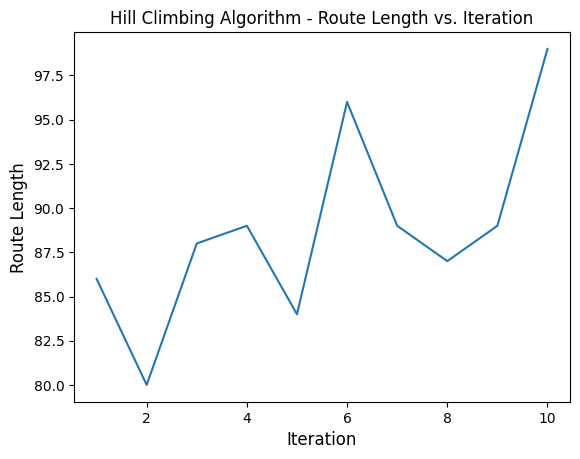

In [38]:
#represent the problem space in an array
def main():
   
    # Initialize a list to store the route lengths
    route_lengths = []

    # Open distance matrix
    with open("TSP_Matrix.txt", "r") as f:
        contents = f.read()

    # Clean the data
    contents = contents.strip()
    strings = contents.replace(",", " ").split()
    numbers = list(map(int, strings))  # string to a list of integers
    tspMatrix = np.array(numbers)

    # Reshape the matrix into 2D
    rows = int(np.sqrt(tspMatrix.size))
    tspMatrix = tspMatrix.reshape((rows, -1))

    # Initialize a list to store the outcomes
    outcomes = []

    # Run hill climbing algorithm 10 times
    for i in range(10):
        result = hillClimbing(tspMatrix)
        route_lengths.append(result[1])  # Append the route length to the list
        outcomes.append(result)
        print(f"\nOutcome of Iteration {i + 1}:")
        print(f"Route Length: {result[1]}")
        print(f"Route: {result[0]}")

    # Convert outcomes to a NumPy array
    # outcomes = np.array(outcomes)
    outcomes = np.array([x[0] for x in outcomes]), np.array([x[1] for x in outcomes])

    # Visualize results
    plt.plot(range(1, 11), route_lengths)
    plt.xlabel("Iteration", fontsize=12)
    plt.ylabel("Route Length", fontsize=12)
    plt.title("Hill Climbing Algorithm - Route Length vs. Iteration")
    plt.show()


if __name__ == "__main__":
    main()
